In [59]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [60]:
url = "web_scraper/no_games.csv"
df = pd.read_csv(url)
df.head(15)

,actor,movie_or_TV_name
0,Chie Nakamura,Boruto: Naruto Next Generations
1,Chie Nakamura,The World's Finest Assassin Gets Reincarnated ...
2,Chie Nakamura,Jujutsu Kaisen
3,Chie Nakamura,Dororo
4,Chie Nakamura,Ace Attorney
5,Chie Nakamura,Devilman: Crybaby
6,Chie Nakamura,Vatican Miracle Examiner
7,Chie Nakamura,Naruto: Shippûden
8,Chie Nakamura,The Day Naruto Became Hokage
9,Chie Nakamura,Tokyo Ghoul: Pinto


In [61]:
df.shape

(17448, 2)

In [62]:
G = nx.from_pandas_edgelist(df.iloc[0:17448], 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [63]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 30]

In [64]:
to_be_removed[0:5]

["The World's Finest Assassin Gets Reincarnated in Another World as an Aristocrat",
 'Jujutsu Kaisen',
 'Dororo',
 'Ace Attorney',
 'Devilman: Crybaby']

In [65]:
for x in to_be_removed:
    G.remove_node(x)

In [66]:
colors = []
for node in G:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

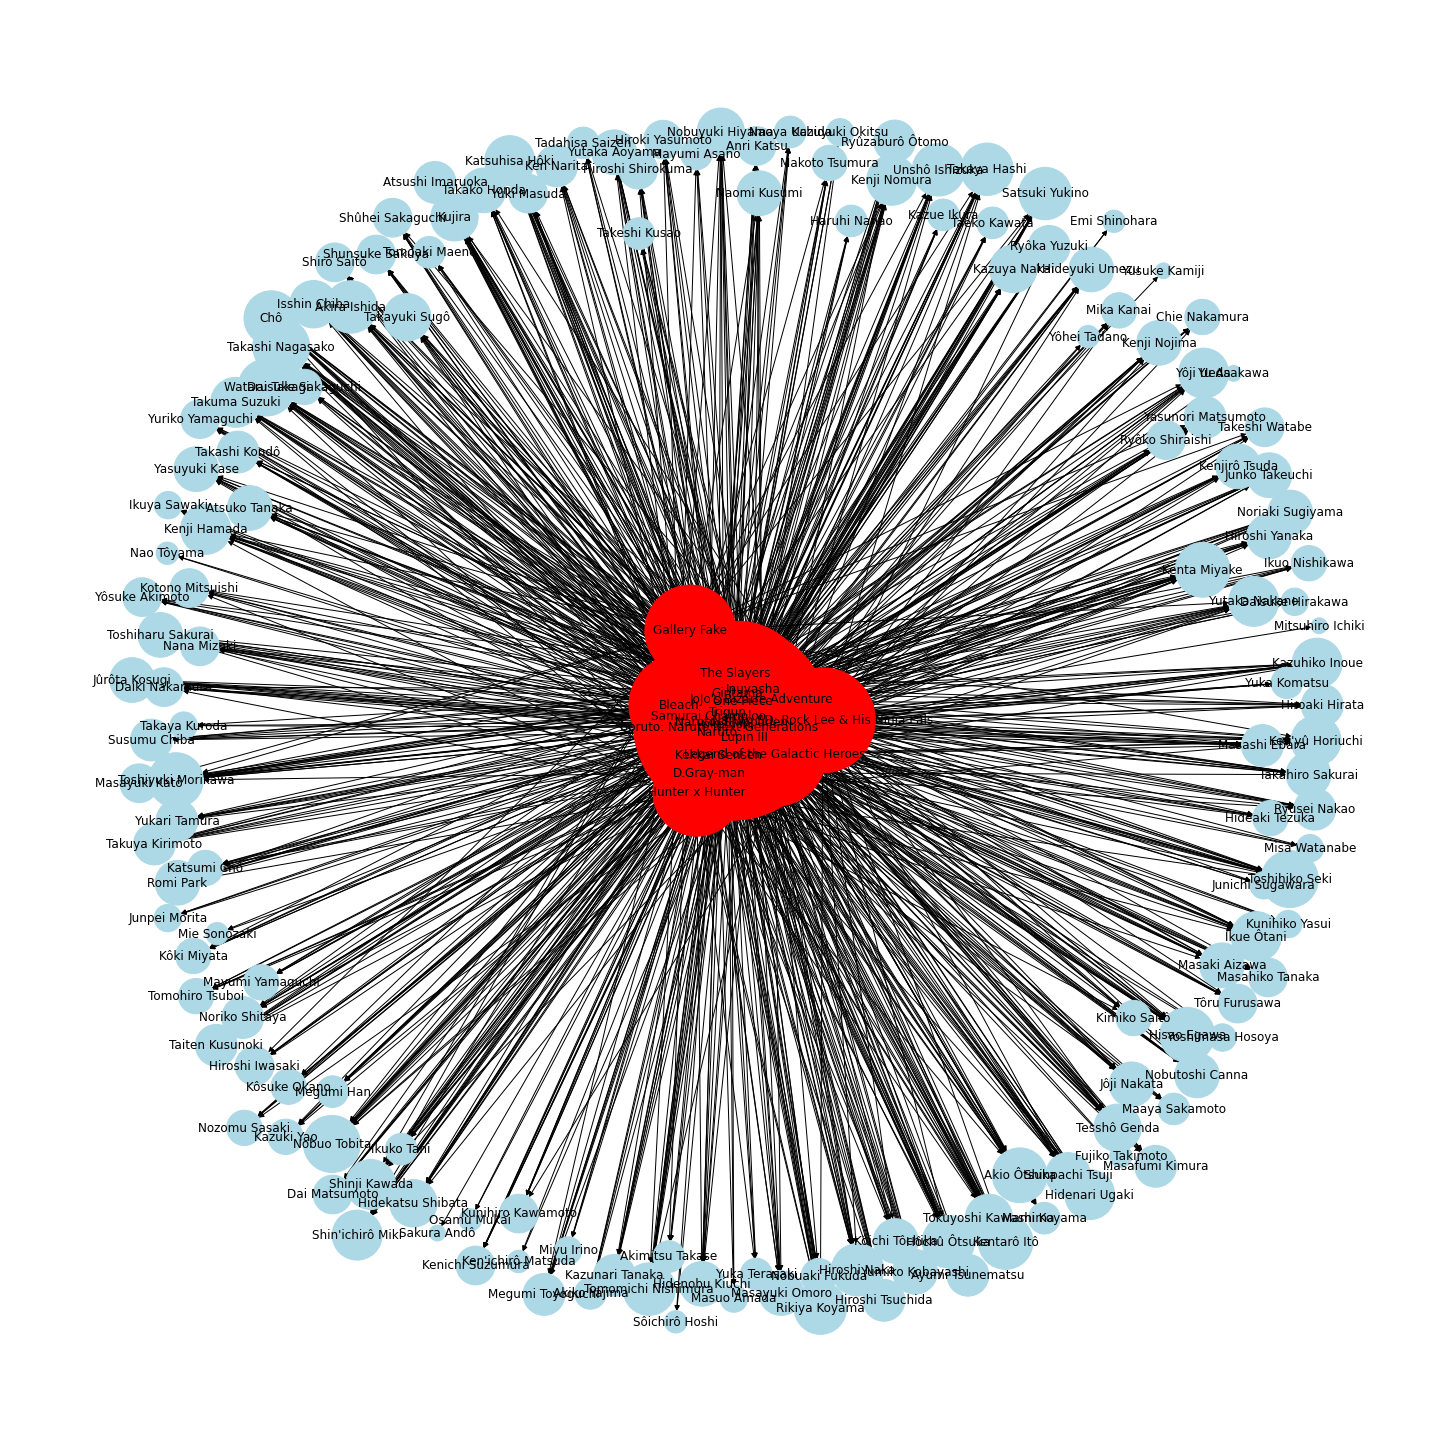

In [67]:
deg = G.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [250*deg[i] for i in G.nodes()])

In [68]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]

[('Naruto: Shippûden', 155),
 ('Naruto', 103),
 ('Pokémon', 85),
 ('Gintama', 82),
 ('One Piece', 73),
 ('Boruto: Naruto Next Generations', 64),
 ('Naruto SD: Rock Lee & His Ninja Pals', 44),
 ('Legend of the Galactic Heroes', 43),
 ("JoJo's Bizarre Adventure", 42),
 ('Bleach', 41)]

In [69]:
import plotly.graph_objects as go
import networkx as nx
import plotly

In [70]:
A = list(df["actor"].unique())
B = list(df["movie_or_TV_name"].unique())
node_list = set(A+B)

In [71]:
G = nx.Graph()

In [72]:
for i in node_list:
    G.add_node(i)

In [73]:
for i,j in df.iterrows():
    G.add_edges_from([(j["actor"],j["movie_or_TV_name"])])

In [74]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 30]
for x in to_be_removed:
    G.remove_node(x)

In [75]:
pos = nx.spring_layout(G, k=5, iterations=50)

In [76]:
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [77]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [78]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [79]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [80]:
plt.figure(figsize=(20, 20))
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Naruto network connections',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

<Figure size 1440x1440 with 0 Axes>